In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N_HIDDEN = 8
WIDTH = 30

# 4K
# RESOLUTION_X = 3840
# RESOLUTION_Y = 2160

# 1080p
# RESOLUTION_X = 1920
# RESOLUTION_Y = 1080

In [3]:
def getLinear(in_dims, out_dims):
    layer = torch.nn.Linear(in_dims, out_dims)
    torch.nn.init.uniform_(layer.weight, -2.0, 2.0)
    return layer

In [4]:
def getModel():
    layers = [
        getLinear(2, WIDTH),
        torch.nn.Tanh()
    ]

    for i in range(N_HIDDEN):
        layers.append(getLinear(WIDTH, WIDTH))
        layers.append(torch.nn.Tanh())

    layers.append(getLinear(WIDTH, 3))
    layers.append(torch.nn.Sigmoid())

    model = torch.nn.Sequential(*layers)
    model = model.to(device)
    
    return model

(-0.5, 3839.5, 2159.5, -0.5)

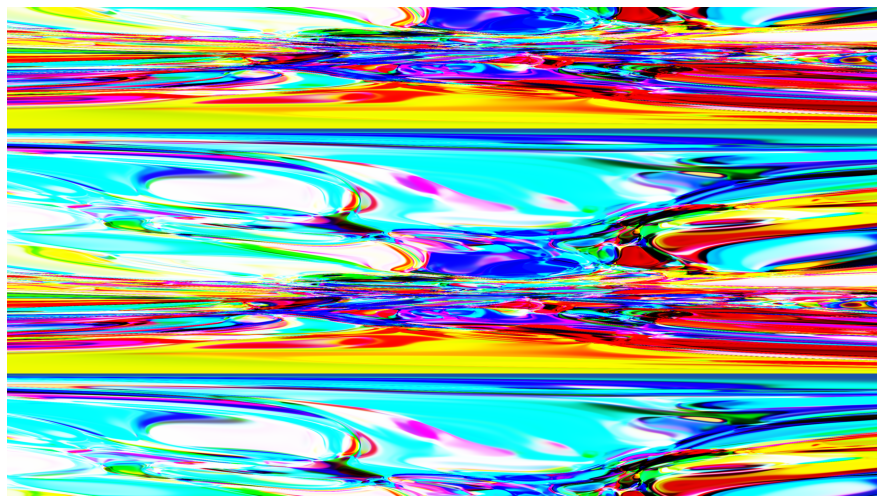

In [44]:
device = torch.device('cuda')

model = getModel()

coords_x = np.linspace(start=-1, stop=1, num=RESOLUTION_X, dtype=np.float32)

# Sinusoidal
# coords_x = np.sin(np.linspace(start=0, stop=np.pi, num=RESOLUTION_X, dtype=np.float32))
# coords_x = (2 * coords_x) - 1

coords_y = np.tan(np.linspace(start=0, stop=2 * np.pi, num=RESOLUTION_Y, dtype=np.float32))
coords_y = (2 * coords_y) - 1

# Linear
# coords_y = np.linspace(start=-1, stop=1, num=RESOLUTION_Y, dtype=np.float32)

coords = np.stack(np.meshgrid(coords_x, coords_y))
coords = np.transpose(coords, [1, 2, 0])

coords_flat = coords.reshape(-1, 2)
coords_flat = torch.tensor(coords_flat).to(torch.float)
coords_flat = coords_flat.to(device)

# # coords = np.mgrid[0:1:(1/RESOLUTION_Y), 0:1:(1/RESOLUTION_X)]
# # coords = np.transpose(coords, [1, 2, 0])

# # coords_flat = coords.reshape(-1, 2)
# # coords_flat = torch.tensor(coords_flat).to(torch.float)
# # coords_flat = (coords_flat * 2) - 1
# # coords_flat = coords_flat.to(device)

with torch.no_grad():
    out_flat = model(coords_flat)
    
out = out_flat.to('cpu').numpy().reshape(RESOLUTION_Y, RESOLUTION_X, 3)

plt.subplots(figsize=(16, 9))
plt.imshow(out)
plt.axis('off')

In [43]:
plt.imsave(fname='symmetric_xy_tan.png', arr=out, format='png')

In [6]:
coords.shape

(2160, 3840, 2)